Load required dependencies: This could take a few minutes

In [5]:
# Install required packages
!pip3 install -r requirements.txt
print("All requirements installed successfully!")
# Download NLTK data



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
All requirements installed successfully!


Next, load the data into a pandas dataframe

In [6]:
import pandas as pd
import os
import numpy as np

def load_data(file_path='Search_terms.csv'):
    """Load the search terms data from CSV file."""
    try:
        # Try to find the file in various locations
        possible_paths = [
            file_path,
            f"../{file_path}",
            f"AmanTask/{file_path}",
            f"../AmanTask/{file_path}"
        ]
        
        for path in possible_paths:
            if os.path.exists(path):
                print(f"Found data file at: {path}")
                # Read with low_memory=False to avoid DtypeWarning
                df = pd.read_csv(path, low_memory=False)
                break
        else:
            print(f"File not found. Searched in: {possible_paths}")
            print(f"Current directory: {os.getcwd()}")
            print(f"Files in current directory: {os.listdir('.')}")
            return None
        
        print(f"Data loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns.")
        
        # Clean up column names and skip header rows if needed
        if 'Search terms report' in df.columns:
            # Check if the first rows contain actual column headers
            potential_headers = df.iloc[0:5].values.tolist()
            header_row = None
            
            # Look for rows that might contain actual column headers
            for i, row in enumerate(potential_headers):
                if any(col in str(val).lower() for val in row for col in ['impressions', 'cpm', 'ad group']):
                    header_row = i
                    break
            
            if header_row is not None:
                # Use the identified row as header
                new_headers = df.iloc[header_row].values
                df = df.iloc[header_row+1:].reset_index(drop=True)
                df.columns = new_headers
                print(f"Used row {header_row} as column headers")
        
        # Print the actual column names after cleaning
        print("\nActual column names:")
        print(df.columns.tolist())
        
        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Load the data
df = load_data()

# Display the first few rows
if df is not None:
    display(df.head())
else:
    print("Failed to load data.")

Found data file at: Search_terms.csv
Data loaded successfully with 157247 rows and 16 columns.
Used row 1 as column headers

Actual column names:
['Search term', 'Match type', 'Added/Excluded', 'Campaign', 'Ad group', 'Currency code', 'Avg. CPM', 'Impr.', 'Interactions', 'Interaction rate', 'Avg. cost', 'Cost', 'Campaign type', 'Conv. rate', 'Conversions', 'Cost / conv.']


,Search term,Match type,Added/Excluded,Campaign,Ad group,Currency code,Avg. CPM,Impr.,Interactions,Interaction rate,Avg. cost,Cost,Campaign type,Conv. rate,Conversions,Cost / conv.
0,mental health support line,Exact match (close variant),NaN,Nebo - Helmsley Grant - Nonbrand - Crisis Support,Helpline / Hotline,USD,280,40,5,12.50%,2.24,11.2,Search,180.00%,9,1.24
1,depression support group,Broad match,NaN,Nebo - Helmsley Grant - Nonbrand - Crisis Support,Helpline / Hotline,USD,187.06,17,1,5.88%,3.18,3.18,Search,100.00%,1,3.18
2,teen help hotline,Broad match,NaN,Nebo - Helmsley Grant - Nonbrand - Crisis Support,Suicide Prevention,USD,456.25,16,4,25.00%,1.83,7.3,Search,100.00%,4,1.83
3,family acceptance project lds,Broad match,NaN,Nebo - Helmsley Grant - Nonbrand - Crisis Support,Helpline / Hotline,USD,840,1,1,100.00%,0.84,0.84,Search,100.00%,1,0.84
4,hope line,Broad match,NaN,Nebo - Helmsley Grant - Nonbrand - Crisis Support,Suicide Prevention,USD,605,6,1,16.67%,3.63,3.63,Search,200.00%,2,1.82


Give a basic summary on the data so we know it looks decent and loaded properly

In [7]:
# Basic data exploration
if df is not None:
    # Display basic info
    print("Data shape:", df.shape)
    
    # Check for missing values
    print("\nMissing values per column:")
    print(df.isnull().sum())
    
    # Display summary statistics
    print("\nSummary statistics:")
    display(df.describe())
    
    # Check unique values in Ad Group column
    ad_group_col = None
    for col in df.columns:
        if 'ad group' in str(col).lower():
            ad_group_col = col
            break
    
    if ad_group_col:
        print(f"\nUnique Ad Groups ({ad_group_col}):")
        display(df[ad_group_col].value_counts())

Data shape: (157245, 16)

Missing values per column:
Search term              0
Match type               8
Added/Excluded      154975
Campaign                 8
Ad group                 8
Currency code            0
Avg. CPM                 0
Impr.                    0
Interactions             0
Interaction rate         0
Avg. cost                0
Cost                     0
Campaign type            3
Conv. rate               0
Conversions              0
Cost / conv.             0
dtype: int64

Summary statistics:


,Search term,Match type,Added/Excluded,Campaign,Ad group,Currency code,Avg. CPM,Impr.,Interactions,Interaction rate,Avg. cost,Cost,Campaign type,Conv. rate,Conversions,Cost / conv.
count,157245,157237,2270,157237,157237,157245,157245,157245,157245,157245,157245,157245,157242,157245,157245,157245
unique,125331,5,3,19,54,1,8309,478,235,1040,1929,3163,5,578,353,1555
top,trevor project donation,Broad match,Excluded,Nebo - Pride June 2023 - YouTube - Traffic - S...,Supportive Adults Prospecting,USD,0,1,0,0.00%,0,0,Search,0.00%,0,0
freq,80,110721,1165,59114,59116,157245,82695,105187,141293,141290,143356,140349,96135,153174,153176,153179



Unique Ad Groups (Ad group):


Ad group
Supportive Adults Prospecting                                        59116
prospecting                                                          21850
Helpline / Hotline                                                   17639
Transgender                                                           9894
LGBTQ+ Chat                                                           6470
Gay and Lesbian                                                       5561
Donation - General - Evergreen                                        4740
Coming Out                                                            4386
Bisexual                                                              2601
Branded - Phrase and Exact - Evergreen                                2384
Nonbrand - Mental Health Awareness Month - General                    2337
13-24                                                                 1987
Suicide Prevention                                                    1938
Pride 2024 - Non

Define functions which will be used later to clean the data and plot the changes

In [8]:
# Import necessary libraries for data cleaning
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from io import StringIO
from contextlib import redirect_stdout

def clean_data(df, min_impressions=5):
    """Remove rows with fewer impressions than the threshold."""
    if df is None:
        return None
    
    # Count rows before filtering
    rows_before = df.shape[0]
    
    # Look for the impressions column - specifically 'Impr.'
    impressions_col = 'Impr.'
    if impressions_col not in df.columns:
        # Try to find any column that might contain impression information
        for col in df.columns:
            if 'impr' in str(col).lower():
                impressions_col = col
                break
        
        if impressions_col not in df.columns:
            return df
    
    # Convert impressions to numeric, coercing errors to NaN
    df[impressions_col] = pd.to_numeric(df[impressions_col], errors='coerce')
    
    # Filter rows with at least min_impressions
    df_cleaned = df[df[impressions_col] >= min_impressions]
    
    print(f"Removed {rows_before - df_cleaned.shape[0]} rows with fewer than {min_impressions} impressions")
    print(f"Rows remaining: {df_cleaned.shape[0]}")
    
    return df_cleaned

def remove_sparse_rows(df, threshold=0.7):
    """Remove rows with more than threshold proportion of missing values."""
    if df is None:
        return None
    
    # Count rows before filtering
    rows_before = df.shape[0]
    
    # Calculate the proportion of non-missing values for each row
    completeness = df.count(axis=1) / df.shape[1]
    
    # Keep rows with completeness above threshold
    df_cleaned = df[completeness >= threshold]
    
    print(f"Removed {rows_before - df_cleaned.shape[0]} sparse rows with less than {threshold*100}% complete data")
    print(f"Rows remaining: {df_cleaned.shape[0]}")
    
    return df_cleaned

def get_ad_group_data(df, ad_group_name='Supportive Adults Prospecting'):
    """Extract data for a specific Ad Group."""
    # Find the Ad Group column
    ad_group_col = 'Ad group'
    if ad_group_col not in df.columns:
        # Try to find any column that might contain ad group information
        for col in df.columns:
            if 'ad group' in str(col).lower():
                ad_group_col = col
                break
    
    # Filter data for the specified Ad Group
    ad_group_data = df[df[ad_group_col] == ad_group_name]
    print(f"Extracted {len(ad_group_data)} rows for Ad Group '{ad_group_name}'")
    
    return ad_group_data

def visualize_impressions(df, original_df=None):
    """Create visualizations for the impressions distribution."""
    if df is None:
        return
    
    # Find the impressions column - specifically 'Impr.'
    impressions_col = 'Impr.'
    if impressions_col not in df.columns:
        # Try to find any column that might contain impression information
        for col in df.columns:
            if 'impr' in str(col).lower():
                impressions_col = col
                break
        
        if impressions_col not in df.columns:
            return
    
    # Ensure impressions are numeric
    df[impressions_col] = pd.to_numeric(df[impressions_col], errors='coerce')
    
    plt.figure(figsize=(12, 6))
    
    # If we have both original and cleaned dataframes, show before/after
    if original_df is not None:
        original_df[impressions_col] = pd.to_numeric(original_df[impressions_col], errors='coerce')
        
        plt.subplot(1, 2, 1)
        sns.histplot(original_df[impressions_col].dropna(), bins=50, kde=True)
        plt.title('Impressions Distribution (Before Cleaning)')
        plt.xlabel('Impressions')
        plt.ylabel('Count')
        plt.xscale('log')
        
        plt.subplot(1, 2, 2)
        sns.histplot(df[impressions_col].dropna(), bins=50, kde=True)
        plt.title('Impressions Distribution (After Cleaning)')
        plt.xlabel('Impressions')
        plt.ylabel('Count')
        plt.xscale('log')
    else:
        # Just show the cleaned data
        sns.histplot(df[impressions_col].dropna(), bins=50, kde=True)
        plt.title('Impressions Distribution')
        plt.xlabel('Impressions')
        plt.ylabel('Count')
        plt.xscale('log')
    
    plt.tight_layout()
    return plt.gcf()  # Return the figure for display in notebook

Call the above functions which will actually clean data and return a summary

=== Data Cleaning Process ===
Removed 141490 rows with fewer than 5 impressions
Rows remaining: 15755
Removed 0 sparse rows with less than 70.0% complete data
Rows remaining: 15755
Extracted 3283 rows for Ad Group 'Supportive Adults Prospecting'

Basic information about the cleaned dataset:
Shape: (15755, 16)

Summary statistics for cleaned data:


,Impr.
count,15755.000000
mean,21.508537
std,54.735360
min,5.000000
25%,6.000000
50%,9.000000
75%,16.000000
max,992.000000



Basic information about 'Ad group' Ad Group:
Shape: (3283, 16)

Summary statistics for Ad Group data:


,Impr.
count,3283.000000
mean,17.373744
std,35.329391
min,5.000000
25%,6.000000
50%,8.000000
75%,15.000000
max,644.000000



Visualizing impressions distribution...


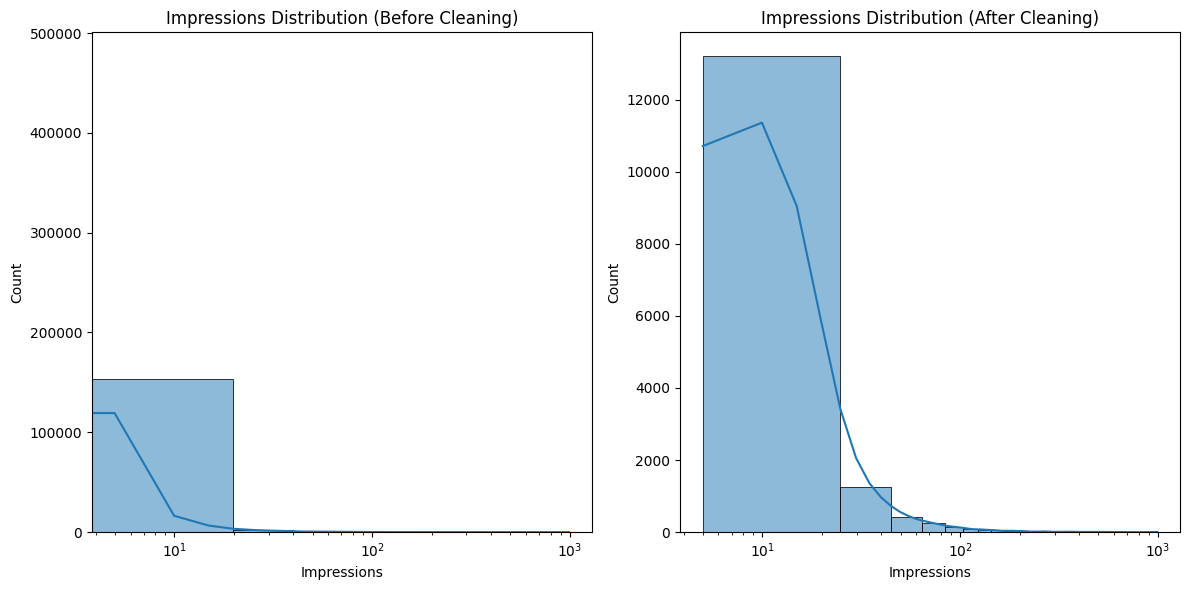


Cleaning complete! The data is now ready for analysis.


/var/folders/pk/yx6gzrjs2h5618dl_vhx3_nm0000gn/T/ipykernel_14938/1207039569.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_group_data[col] = ad_group_data[col].astype(str).str.replace('$', '').str.replace(',', '')
/var/folders/pk/yx6gzrjs2h5618dl_vhx3_nm0000gn/T/ipykernel_14938/1207039569.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_group_data[col] = pd.to_numeric(ad_group_data[col], errors='coerce')
/var/folders/pk/yx6gzrjs2h5618dl_vhx3_nm0000gn/T/ipykernel_14938/1207039569.py:39: Setti

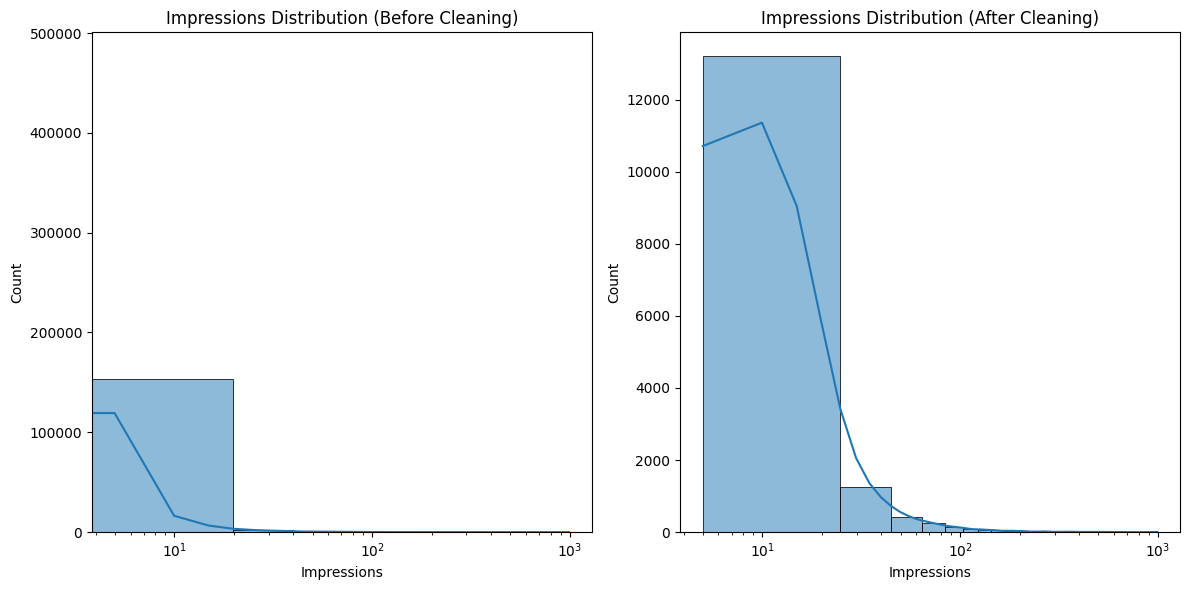

In [9]:
# Apply data cleaning steps from EDA.py
print("=== Data Cleaning Process ===")

# Keep a copy of the original data for comparison
df_original = df.copy()

# Step 1: Clean data by removing rows with low impressions
df_cleaned = clean_data(df, min_impressions=5)

# Step 2: Remove sparse rows
df_cleaned = remove_sparse_rows(df_cleaned, threshold=0.7)

# Step 3: Get data for the largest Ad Group (Supportive Adults Prospecting)
ad_group_data = get_ad_group_data(df_cleaned, 'Supportive Adults Prospecting')

# Display basic info about the cleaned data
print("\nBasic information about the cleaned dataset:")
print(f"Shape: {df_cleaned.shape}")
print("\nSummary statistics for cleaned data:")
display(df_cleaned.describe())

# Display basic info about the selected Ad Group
print(f"\nBasic information about '{ad_group_data.columns[4]}' Ad Group:")
print(f"Shape: {ad_group_data.shape}")
print("\nSummary statistics for Ad Group data:")
display(ad_group_data.describe())

# Visualize the impressions distribution
print("\nVisualizing impressions distribution...")
fig = visualize_impressions(df_cleaned, df_original)
display(fig)

# Convert numeric columns to proper numeric types
numeric_cols = ['Avg. CPM', 'Impr.', 'Interactions', 'Avg. cost', 'Cost', 'Conversions', 'Cost / conv.']
for col in numeric_cols:
    if col in ad_group_data.columns:
        if ad_group_data[col].dtype == object:
            # Remove $ and , from the values if they're strings
            ad_group_data[col] = ad_group_data[col].astype(str).str.replace('$', '').str.replace(',', '')
        ad_group_data[col] = pd.to_numeric(ad_group_data[col], errors='coerce')

print("\nCleaning complete! The data is now ready for analysis.")

The next 6 cells actually take this cleaned data and run it through all of the ML models and train data, benchmarking and saving progress.

In [11]:
# Import necessary libraries for ML models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb
from gensim.models import Word2Vec
import re
import os
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Create Results directory if it doesn't exist
os.makedirs('MLResults', exist_ok=True)

def preprocess_text(text):
    """Clean and tokenize text without using NLTK."""
    if not isinstance(text, str):
        return []
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Simple tokenization (split by whitespace)
    tokens = text.split()
    
    # Remove short tokens (likely not meaningful)
    tokens = [token for token in tokens if len(token) > 2]
    
    return tokens

def train_word2vec(search_terms, vector_size=100, window=5, min_count=1):
    """Train a Word2Vec model on search terms."""
    # Preprocess and tokenize search terms
    tokenized_texts = []
    for term in search_terms:
        tokens = preprocess_text(term)
        if tokens:  # Only add non-empty token lists
            tokenized_texts.append(tokens)
    
    print(f"Training Word2Vec model on {len(tokenized_texts)} search terms...")
    
    # Train Word2Vec model
    model = Word2Vec(sentences=tokenized_texts, 
                     vector_size=vector_size, 
                     window=window, 
                     min_count=min_count,
                     workers=4)
    
    print("Word2Vec model trained successfully.")
    print(f"Vocabulary size: {len(model.wv.key_to_index)}")
    
    return model, tokenized_texts

def get_text_vector(text, word2vec_model, vector_size=100):
    """Convert text to a vector using Word2Vec."""
    if not isinstance(text, str):
        return np.zeros(vector_size)
    
    # Tokenize the text
    tokens = preprocess_text(text)
    
    if not tokens:
        return np.zeros(vector_size)
    
    # Get word vectors for each token and average them
    word_vectors = []
    for token in tokens:
        if token in word2vec_model.wv:
            word_vectors.append(word2vec_model.wv[token])
    
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(vector_size)

In [13]:
def engineer_features(df, word2vec_model, search_term_col, vector_size=100):
    """Engineer features for ML models."""
    print("Engineering features...")
    
    # Create a copy of the dataframe to avoid modifying the original
    df_features = df.copy()
    
    # Convert search terms to vectors using Word2Vec
    search_term_vectors = []
    for term in df_features[search_term_col]:
        vector = get_text_vector(term, word2vec_model, vector_size)
        search_term_vectors.append(vector)
    
    # Convert list of vectors to a DataFrame
    vector_columns = [f'vec_{i}' for i in range(vector_size)]
    vector_df = pd.DataFrame(search_term_vectors, columns=vector_columns)
    
    # Reset index to ensure proper concatenation
    df_features.reset_index(drop=True, inplace=True)
    vector_df.reset_index(drop=True, inplace=True)
    
    # Concatenate the original dataframe with the vector dataframe
    df_features = pd.concat([df_features, vector_df], axis=1)
    
    # Add text length as a feature
    df_features['text_length'] = df_features[search_term_col].apply(
        lambda x: len(str(x)) if isinstance(x, str) else 0
    )
    
    # Add word count as a feature
    df_features['word_count'] = df_features[search_term_col].apply(
        lambda x: len(str(x).split()) if isinstance(x, str) else 0
    )
    
    print(f"Feature engineering complete. Dataset shape: {df_features.shape}")
    
    return df_features

def prepare_train_test_data(df_features, target_col, test_size=0.2):
    """Prepare data for training and testing."""
    # Identify feature columns (Word2Vec vectors and other engineered features)
    feature_cols = [col for col in df_features.columns if col.startswith('vec_')]
    feature_cols += ['text_length', 'word_count']
    
    # Ensure target column is numeric
    df_features[target_col] = pd.to_numeric(df_features[target_col], errors='coerce')
    
    # Drop rows with missing target values
    df_valid = df_features.dropna(subset=[target_col])
    
    if df_valid.empty:
        print(f"Error: No valid data for target '{target_col}' after dropping NaN values.")
        return None, None, None, None
    
    # Split data into features and target
    X = df_valid[feature_cols]
    y = df_valid[target_col]
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"Data prepared for target '{target_col}':")
    print(f"  Training set: {X_train_scaled.shape[0]} samples")
    print(f"  Testing set: {X_test_scaled.shape[0]} samples")
    
    return X_train_scaled, X_test_scaled, y_train, y_test

In [14]:
def train_and_evaluate_models(df_features, target_cols):
    """Train and evaluate multiple models for each target."""
    results = []
    
    for target_col in target_cols:
        print(f"\n=== Training models for target: {target_col} ===")
        
        # Prepare data
        X_train, X_test, y_train, y_test = prepare_train_test_data(df_features, target_col)
        
        if X_train is None:
            continue
        
        # Define models to train
        models = {
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
            'Decision Tree': DecisionTreeRegressor(random_state=42),
            'SVR': SVR(kernel='rbf', C=1.0, epsilon=0.1),
            'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
        }
        
        # Train and evaluate each model
        for model_name, model in models.items():
            print(f"Training {model_name}...")
            
            # Train the model
            model.fit(X_train, y_train)
            
            # Make predictions
            y_pred = model.predict(X_test)
            
            # Calculate metrics
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            
            # Calculate mean percentage deviation
            # Avoid division by zero
            y_test_non_zero = np.where(y_test == 0, 1e-10, y_test)
            percentage_errors = np.abs((y_test - y_pred) / y_test_non_zero) * 100
            mean_percentage_deviation = np.mean(percentage_errors)
            
            # Store results
            result = {
                'target_col': target_col,
                'model_name': model_name,
                'model': model,
                'rmse': rmse,
                'mean_percentage_deviation': mean_percentage_deviation,
                'y_test': y_test,
                'y_pred': y_pred
            }
            
            results.append(result)
            
            print(f"  RMSE: {rmse:.4f}")
            print(f"  Mean Percentage Deviation: {mean_percentage_deviation:.2f}%")
    
    return results

In [15]:
def plot_results(results):
    """Plot model performance results."""
    # Create a DataFrame from results
    results_data = []
    for result in results:
        results_data.append({
            'Target': result['target_col'],
            'Model': result['model_name'],
            'RMSE': result['rmse'],
            'Mean % Deviation': result['mean_percentage_deviation']
        })
    
    results_df = pd.DataFrame(results_data)
    
    # Plot RMSE by model and target
    plt.figure(figsize=(14, 8))
    
    # Create a grouped bar chart
    ax = sns.barplot(x='Model', y='RMSE', hue='Target', data=results_df)
    
    plt.title('Model Performance Comparison (RMSE)', fontsize=16)
    plt.xlabel('Model', fontsize=14)
    plt.ylabel('RMSE (lower is better)', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Target')
    plt.tight_layout()
    
    # Save the plot
    plt.savefig('MLResults/model_performance_rmse.png')
    plt.show()
    
    # Plot Mean Percentage Deviation by model and target
    plt.figure(figsize=(14, 8))
    
    # Create a grouped bar chart
    ax = sns.barplot(x='Model', y='Mean % Deviation', hue='Target', data=results_df)
    
    plt.title('Model Performance Comparison (Mean % Deviation)', fontsize=16)
    plt.xlabel('Model', fontsize=14)
    plt.ylabel('Mean % Deviation (lower is better)', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Target')
    plt.tight_layout()
    
    # Save the plot
    plt.savefig('MLResults/model_performance_deviation.png')
    plt.show()
    
    # Plot predictions vs actual for the best model for each target
    for target_col in results_df['Target'].unique():
        target_results = results_df[results_df['Target'] == target_col]
        best_model_name = target_results.loc[target_results['RMSE'].idxmin(), 'Model']
        
        # Find the corresponding result
        best_result = next(r for r in results if r['target_col'] == target_col and r['model_name'] == best_model_name)
        
        plt.figure(figsize=(10, 6))
        plt.scatter(best_result['y_test'], best_result['y_pred'], alpha=0.5)
        
        # Add a perfect prediction line
        max_val = max(best_result['y_test'].max(), best_result['y_pred'].max())
        plt.plot([0, max_val], [0, max_val], 'r--')
        
        plt.title(f'Actual vs Predicted: {target_col} using {best_model_name}', fontsize=14)
        plt.xlabel('Actual Values', fontsize=12)
        plt.ylabel('Predicted Values', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        
        # Save the plot
        plt.savefig(f'MLResults/predictions_{target_col.replace(".", "")}.png')
        plt.show()
    
    return results_df

=== Starting Machine Learning Pipeline ===
Training Word2Vec model on 3270 search terms...
Word2Vec model trained successfully.
Vocabulary size: 2226
Engineering features...
Feature engineering complete. Dataset shape: (3283, 118)
Target columns: ['Avg. CPM', 'Impr.', 'Interactions']

=== Training models for target: Avg. CPM ===
Data prepared for target 'Avg. CPM':
  Training set: 2626 samples
  Testing set: 657 samples
Training Random Forest...
  RMSE: 0.5316
  Mean Percentage Deviation: 149.89%
Training K-Nearest Neighbors...
  RMSE: 0.4785
  Mean Percentage Deviation: 123.09%
Training Decision Tree...
  RMSE: 1.0387
  Mean Percentage Deviation: 173.37%
Training SVR...
  RMSE: 0.4511
  Mean Percentage Deviation: 123.58%
Training XGBoost...
  RMSE: 0.5425
  Mean Percentage Deviation: 140.32%

=== Training models for target: Impr. ===
Data prepared for target 'Impr.':
  Training set: 2626 samples
  Testing set: 657 samples
Training Random Forest...
  RMSE: 38.9694
  Mean Percentage Dev

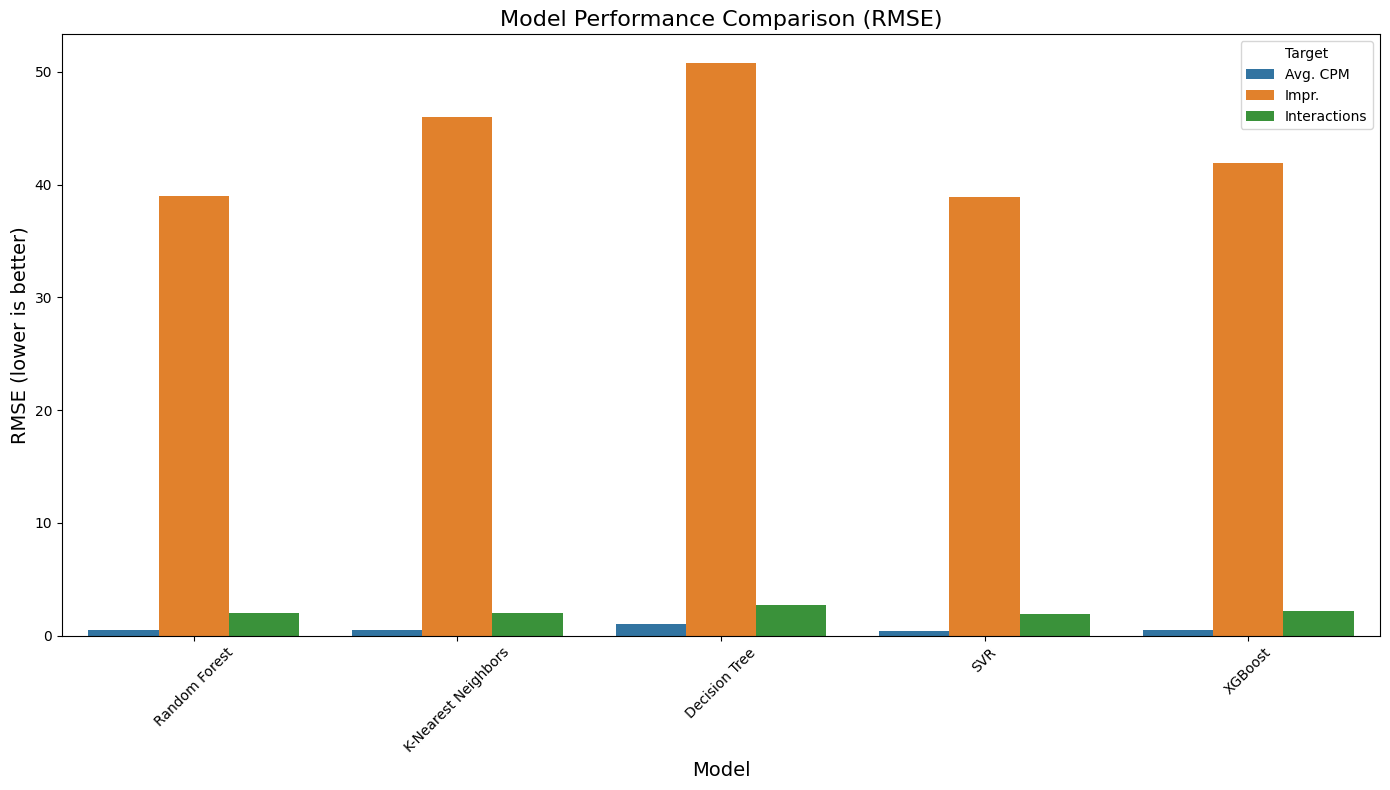

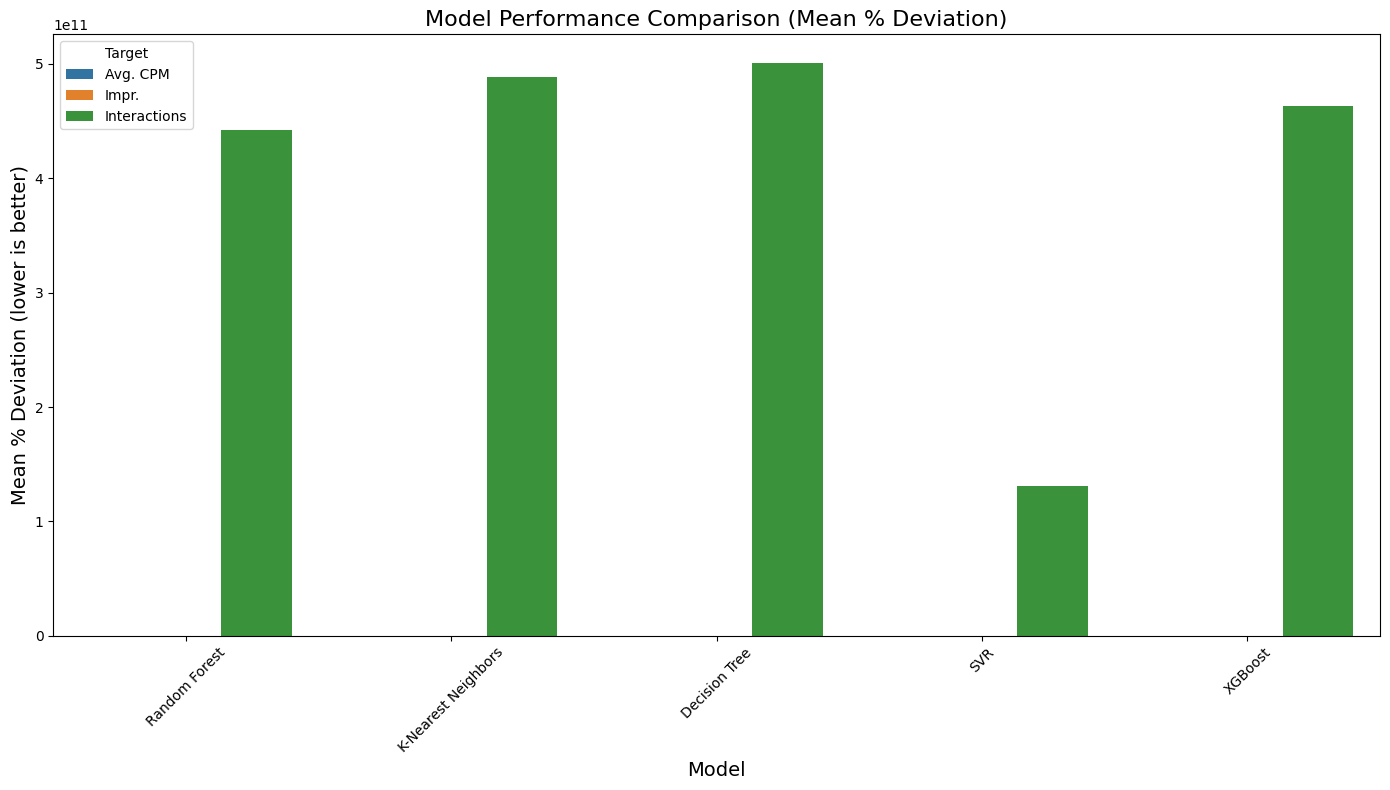

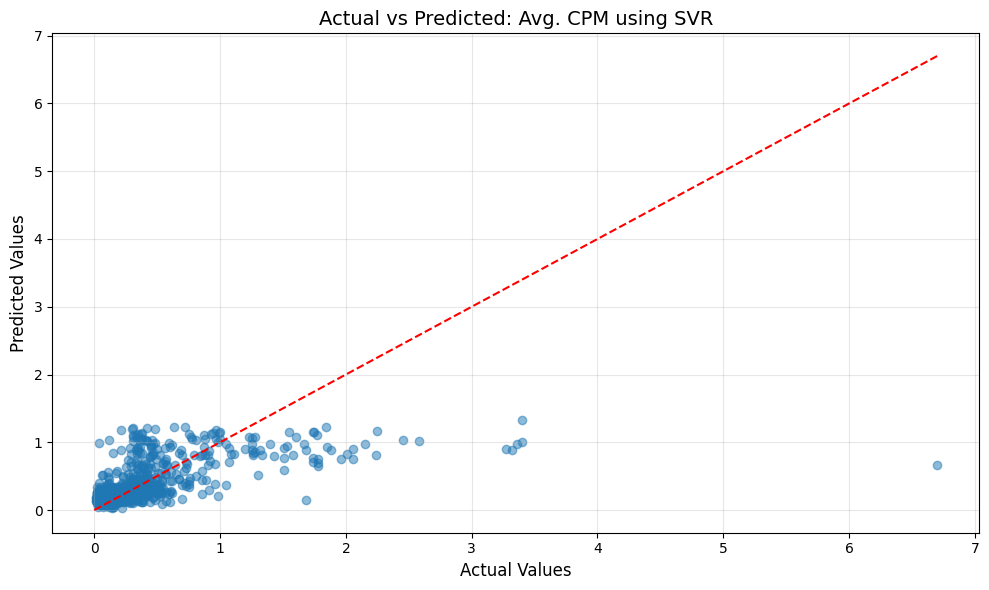

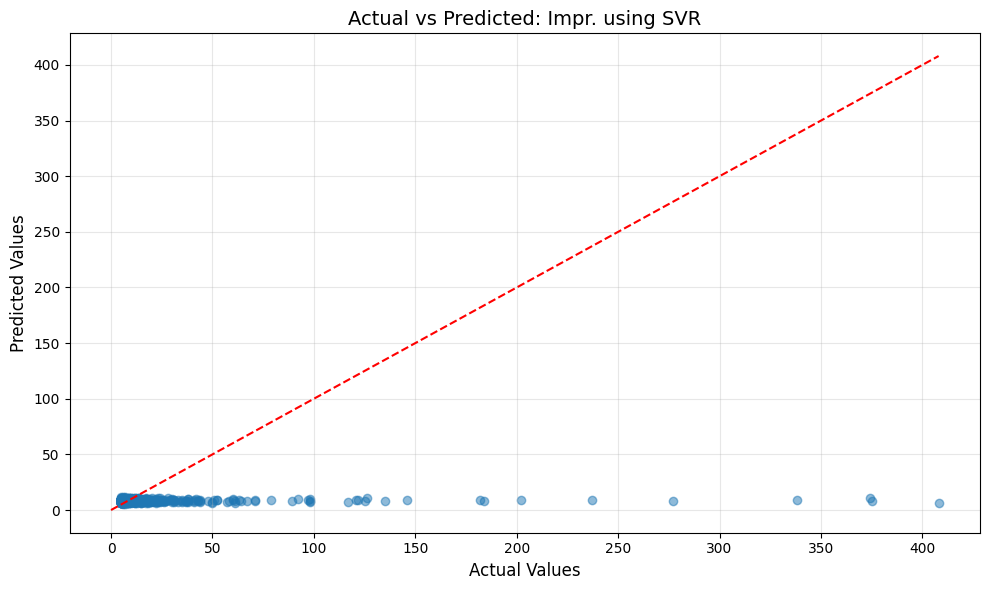

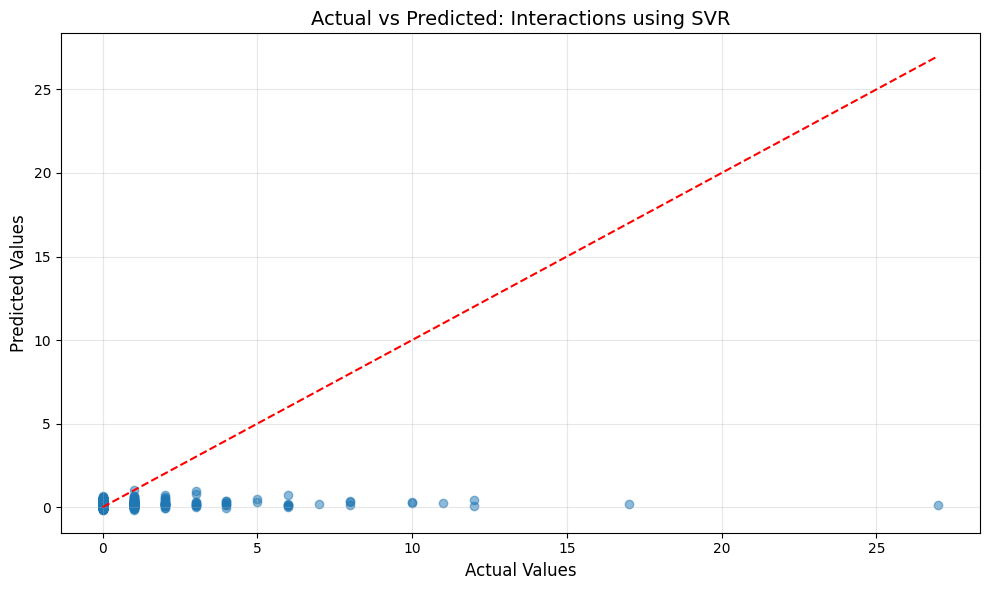


=== Best Models ===
Best model for Avg. CPM:
  Model: SVR
  RMSE: 0.4511
  Mean Percentage Deviation: 123.58%
Best model for Impr.:
  Model: SVR
  RMSE: 38.8681
  Mean Percentage Deviation: 42.49%
Best model for Interactions:
  Model: SVR
  RMSE: 1.9139
  Mean Percentage Deviation: 130500349445.45%


In [16]:
# Run the ML pipeline on the cleaned data
print("=== Starting Machine Learning Pipeline ===")

# Train Word2Vec model on search terms
search_term_col = 'Search term'
word2vec_model, tokenized_texts = train_word2vec(ad_group_data[search_term_col])

# Engineer features
df_features = engineer_features(ad_group_data, word2vec_model, search_term_col)

# Identify target columns
target_cols = ['Avg. CPM', 'Impr.', 'Interactions']
print(f"Target columns: {target_cols}")

# Train and evaluate models
results = train_and_evaluate_models(df_features, target_cols)

# Plot results
if results:
    results_df = plot_results(results)
    
    # Find best model for each target
    print("\n=== Best Models ===")
    for target_col in target_cols:
        target_results = [r for r in results if r['target_col'] == target_col]
        if target_results:
            best_model = min(target_results, key=lambda x: x['rmse'])
            print(f"Best model for {target_col}:")
            print(f"  Model: {best_model['model_name']}")
            print(f"  RMSE: {best_model['rmse']:.4f}")
            print(f"  Mean Percentage Deviation: {best_model['mean_percentage_deviation']:.2f}%")
else:
    print("No results to display. Check for errors in the pipeline.")

In [ ]:
# Save the best models for future use
import pickle

if results:
    # Create a dictionary to store best models
    best_models = {}
    
    for target_col in target_cols:
        target_results = [r for r in results if r['target_col'] == target_col]
        if target_results:
            best_model_result = min(target_results, key=lambda x: x['rmse'])
            best_models[target_col] = {
                'model': best_model_result['model'],
                'model_name': best_model_result['model_name'],
                'rmse': best_model_result['rmse'],
                'mean_percentage_deviation': best_model_result['mean_percentage_deviation']
            }
    
    # Save models to disk
    with open('MLResults/best_models.pkl', 'wb') as f:
        pickle.dump(best_models, f)
    
    print("\nBest models saved to 'MLResults/best_models.pkl'")
    
    # Save Word2Vec model for future use
    word2vec_model.save('MLResults/word2vec_model.model')
    print("Word2Vec model saved to 'MLResults/word2vec_model.model'")

As you can see from the above results, SVR is clearly the best performing model. We can try some different kinds of SVR as well in order to see which line type is best (linear, polynomial, etc.)

In [19]:
# Import additional libraries for SVR optimization
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import time

def optimize_svr(X_train, X_test, y_train, y_test, target_col):
    """Optimize SVR hyperparameters using RandomizedSearchCV."""
    print(f"\n=== Optimizing SVR for {target_col} ===")
    print(f"Training data shape: {X_train.shape}, Target data shape: {y_train.shape}")
    
    # Define the parameter distributions for RandomizedSearchCV
    param_distributions = {
        'C': uniform(0.1, 10.0),
        'gamma': uniform(0.01, 1.0),
        'epsilon': uniform(0.01, 0.5),
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
    }
    
    # Create the SVR model
    svr = SVR()
    
    # Limit the number of iterations for 'Interactions' to prevent hanging
    n_iter = 10 if target_col == 'Interactions' else 20
    
    print(f"Starting RandomizedSearchCV with {n_iter} iterations...")
    start_time = time.time()
    
    # Create the RandomizedSearchCV object
    random_search = RandomizedSearchCV(
        estimator=svr,
        param_distributions=param_distributions,
        n_iter=n_iter,  # Number of parameter settings sampled
        cv=3,       # Reduced from 5 to 3 for faster execution
        scoring='neg_mean_squared_error',
        random_state=42,
        n_jobs=-1,   # Use all available cores
        verbose=1    # Add verbosity to see progress
    )
    
    # Fit the random search model
    try:
        print(f"Fitting RandomizedSearchCV for {target_col}...")
        random_search.fit(X_train, y_train)
        fit_time = time.time() - start_time
        print(f"RandomizedSearchCV completed in {fit_time:.2f} seconds")
        
        # Get the best parameters
        best_params = random_search.best_params_
        print(f"Best parameters: {best_params}")
        
        # Get the best model
        best_model = random_search.best_estimator_
        
        print(f"Making predictions with best model for {target_col}...")
        # Make predictions with the best model
        y_pred = best_model.predict(X_test)
        
        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        # Calculate mean percentage deviation
        # Avoid division by zero
        y_test_non_zero = np.where(y_test == 0, 1e-10, y_test)
        percentage_errors = np.abs((y_test - y_pred) / y_test_non_zero) * 100
        mean_percentage_deviation = np.mean(percentage_errors)
        
        print(f"RMSE: {rmse:.4f}")
        print(f"Mean Percentage Deviation: {mean_percentage_deviation:.2f}%")
        
        # Collect results from all models tested
        print(f"Collecting results from all tested models for {target_col}...")
        all_model_results = []
        for i, params in enumerate(random_search.cv_results_['params']):
            model_name = f"SVR ({params['kernel']})"
            model_rmse = np.sqrt(-random_search.cv_results_['mean_test_score'][i])
            
            # We don't have percentage deviation for all models from CV results
            # So we'll just use a placeholder
            model_result = {
                'model_name': model_name,
                'params': params,
                'rmse': model_rmse,
                'mean_percentage_deviation': float('nan')  # Placeholder
            }
            all_model_results.append(model_result)
        
        # Sort by RMSE
        all_model_results = sorted(all_model_results, key=lambda x: x['rmse'])
        
        # Create a result dictionary
        result = {
            'target_col': target_col,
            'model_name': 'SVR (Optimized)',
            'model': best_model,
            'best_params': best_params,
            'rmse': rmse,
            'mean_percentage_deviation': mean_percentage_deviation,
            'y_test': y_test,
            'y_pred': y_pred,
            'all_model_results': all_model_results
        }
        
        print(f"Optimization for {target_col} completed successfully!")
        return result, best_model
        
    except Exception as e:
        print(f"Error during SVR optimization for {target_col}: {e}")
        # Return a simple linear SVR as fallback
        print("Using fallback linear SVR model...")
        fallback_model = SVR(kernel='linear', C=1.0, epsilon=0.1)
        fallback_model.fit(X_train, y_train)
        y_pred = fallback_model.predict(X_test)
        
        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        # Calculate mean percentage deviation
        y_test_non_zero = np.where(y_test == 0, 1e-10, y_test)
        percentage_errors = np.abs((y_test - y_pred) / y_test_non_zero) * 100
        mean_percentage_deviation = np.mean(percentage_errors)
        
        # Create a result dictionary
        result = {
            'target_col': target_col,
            'model_name': 'SVR (Linear - Fallback)',
            'model': fallback_model,
            'best_params': {'kernel': 'linear', 'C': 1.0, 'epsilon': 0.1, 'gamma': 'scale'},
            'rmse': rmse,
            'mean_percentage_deviation': mean_percentage_deviation,
            'y_test': y_test,
            'y_pred': y_pred,
            'all_model_results': []
        }
        
        return result, fallback_model

In [20]:
# Run SVR optimization for each target column
#This may take a few mins
print("=== Starting SVR Optimization ===")

# Create directory for SVR results
os.makedirs('SVRResults', exist_ok=True)

# Train and optimize SVR models for each target
svr_results = []
svr_models = {}

for target_col in target_cols:
    # Prepare data
    X_train, X_test, y_train, y_test = prepare_train_test_data(df_features, target_col)
    
    if X_train is not None:
        # Optimize SVR
        result, model = optimize_svr(X_train, X_test, y_train, y_test, target_col)
        svr_results.append(result)
        svr_models[target_col] = model

# Display SVR optimization results
if svr_results:
    print("\n=== SVR Optimization Results Summary ===")
    for result in svr_results:
        print(f"Target: {result['target_col']}")
        print(f"  RMSE: {result['rmse']:.4f}")
        print(f"  Mean Percentage Deviation: {result['mean_percentage_deviation']:.2f}%")
        print(f"  Best Parameters: {result['best_params']}")
        print()
else:
    print("No SVR optimization results to display.")

=== Starting SVR Optimization ===
Data prepared for target 'Avg. CPM':
  Training set: 2626 samples
  Testing set: 657 samples

=== Optimizing SVR for Avg. CPM ===
Training data shape: (2626, 102), Target data shape: (2626,)
Starting RandomizedSearchCV with 20 iterations...
Fitting RandomizedSearchCV for Avg. CPM...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
RandomizedSearchCV completed in 43.26 seconds
Best parameters: {'C': 3.845401188473625, 'epsilon': 0.4853571532049581, 'gamma': 0.7419939418114051, 'kernel': 'linear'}
Making predictions with best model for Avg. CPM...
RMSE: 0.4934
Mean Percentage Deviation: 247.08%
Optimization for Avg. CPM completed successfully!
Data prepared for target 'Impr.':
  Training set: 2626 samples
  Testing set: 657 samples

=== Optimizing SVR for Impr. ===
Training data shape: (2626, 102), Target data shape: (2626,)
Starting RandomizedSearchCV with 20 iterations...
Fitting RandomizedSearchCV for Impr....
Fitting 3 folds for each of 2

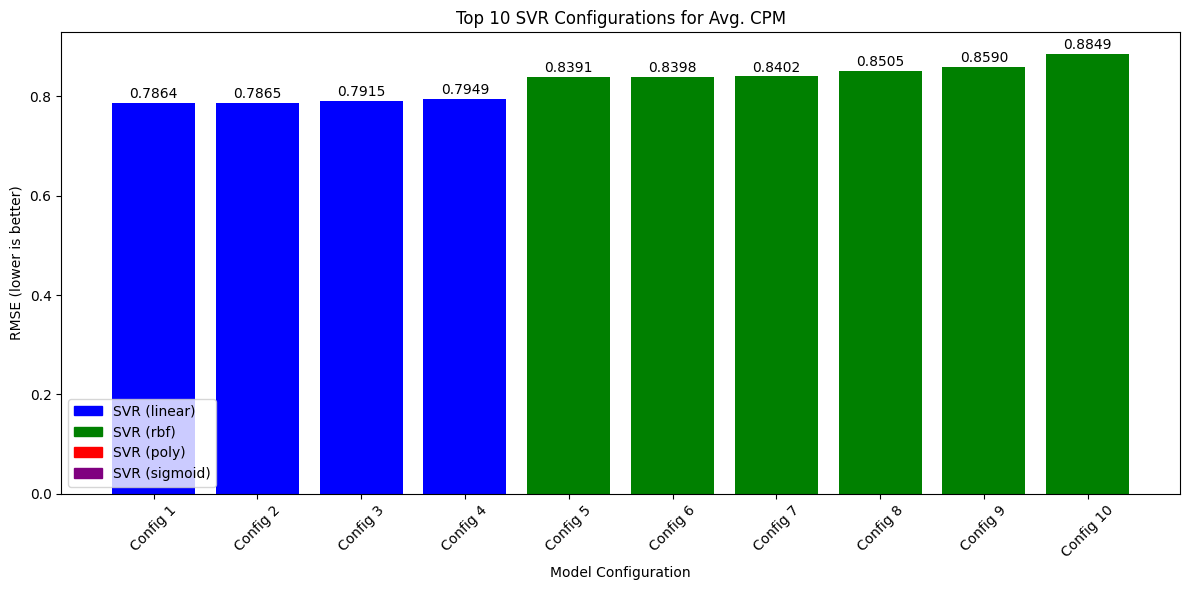


Detailed SVR Results for Avg. CPM:
--------------------------------------------------------------------------------
Config   Kernel     C          Gamma      Epsilon    RMSE      
--------------------------------------------------------------------------------
1        linear     3.8454     0.7420     0.4854     0.7864    
2        linear     3.6675     0.5527     0.1505     0.7865    
3        linear     3.0627     0.0256     0.0926     0.7915    
4        linear     6.0241     0.6175     0.0332     0.7949    
5        rbf        1.9182     0.3142     0.1017     0.8391    
6        rbf        1.4949     0.3764     0.1561     0.8398    
7        rbf        4.6050     0.9522     0.0166     0.8402    
8        rbf        0.6641     0.9486     0.3710     0.8505    
9        rbf        8.7618     0.7181     0.3106     0.8590    
10       rbf        1.9485     0.7851     0.4948     0.8849    


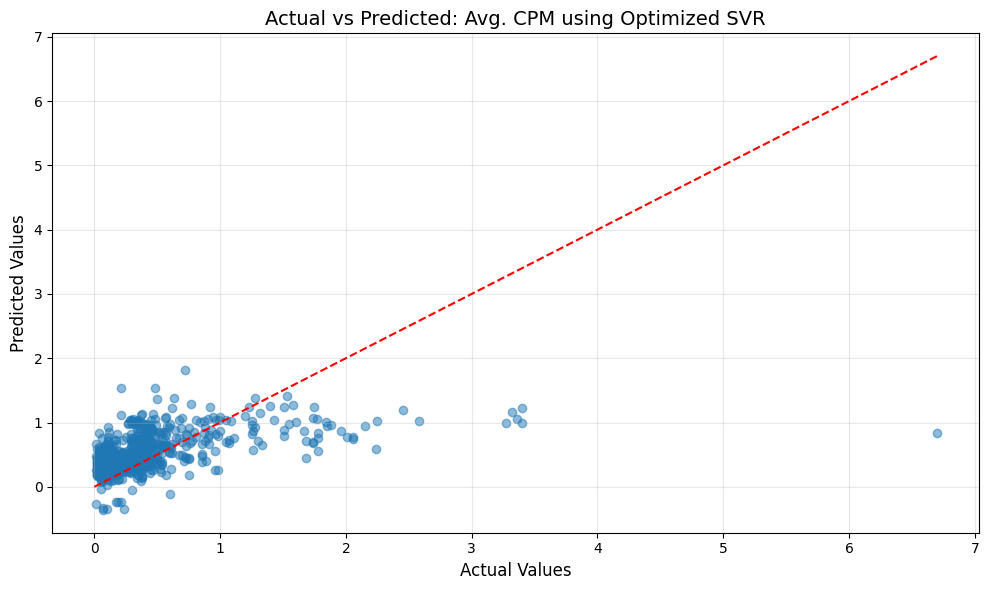

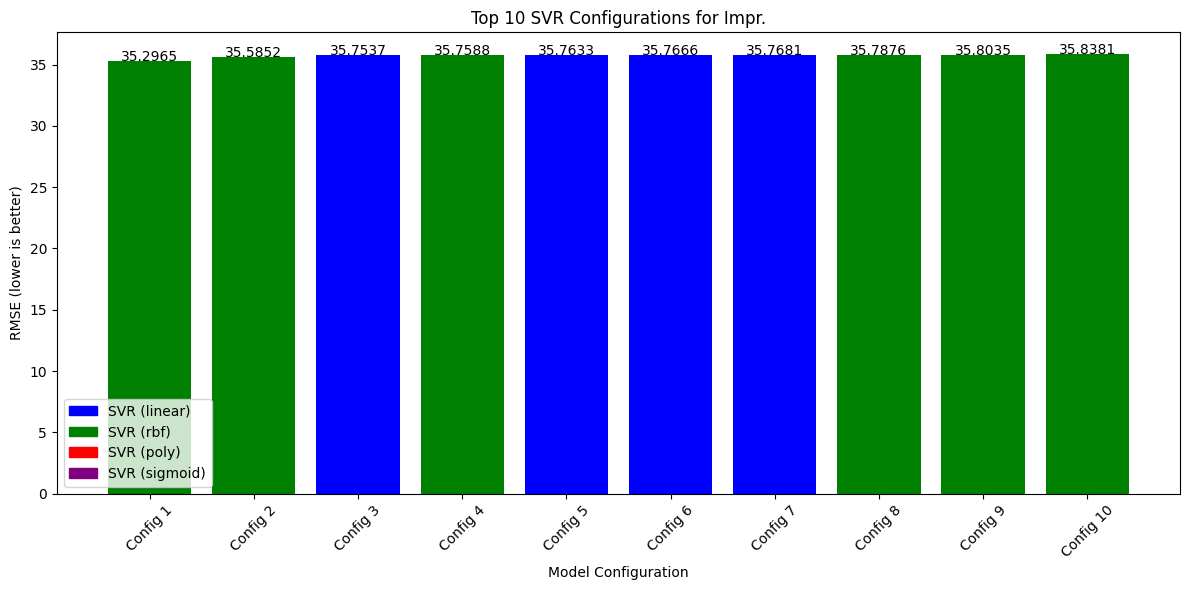


Detailed SVR Results for Impr.:
--------------------------------------------------------------------------------
Config   Kernel     C          Gamma      Epsilon    RMSE      
--------------------------------------------------------------------------------
1        rbf        8.7618     0.7181     0.3106     35.2965   
2        rbf        4.6050     0.9522     0.0166     35.5852   
3        linear     3.8454     0.7420     0.4854     35.7537   
4        rbf        1.9485     0.7851     0.4948     35.7588   
5        linear     3.0627     0.0256     0.0926     35.7633   
6        linear     6.0241     0.6175     0.0332     35.7666   
7        linear     3.6675     0.5527     0.1505     35.7681   
8        rbf        1.9182     0.3142     0.1017     35.7876   
9        rbf        1.4949     0.3764     0.1561     35.8035   
10       rbf        0.6641     0.9486     0.3710     35.8381   


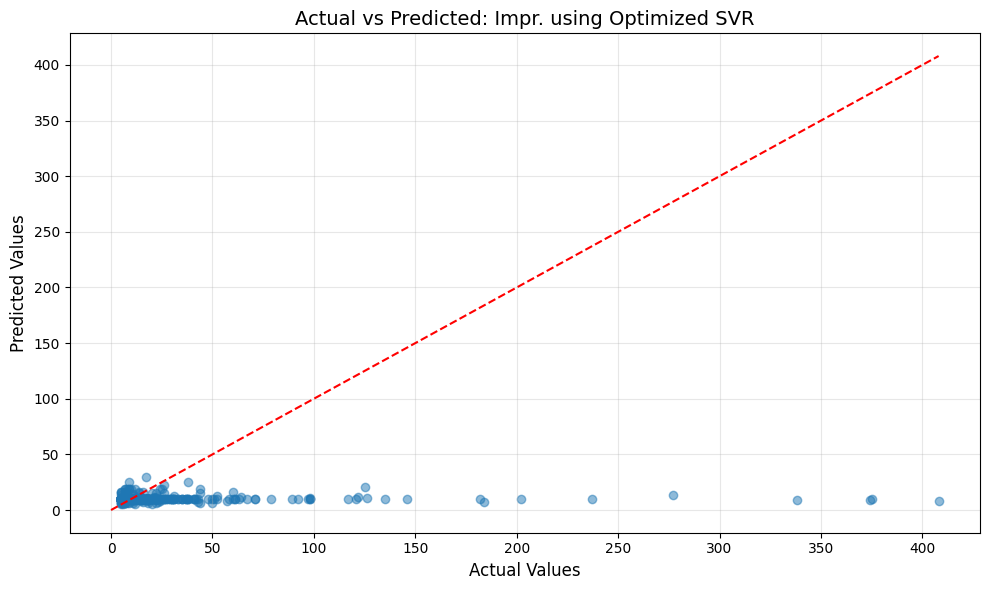

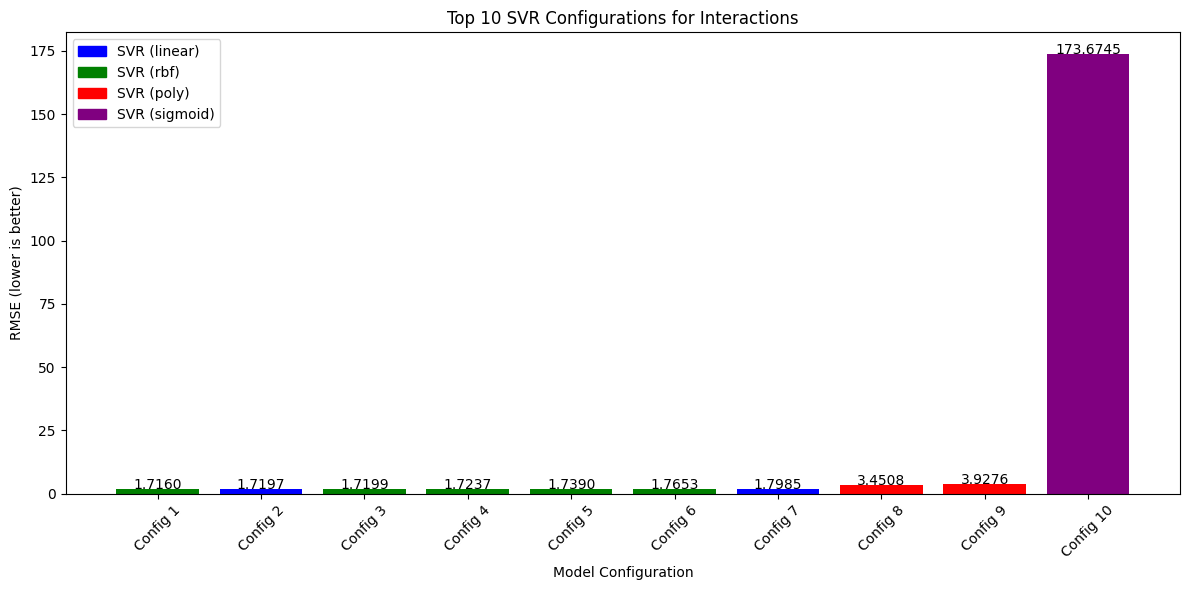


Detailed SVR Results for Interactions:
--------------------------------------------------------------------------------
Config   Kernel     C          Gamma      Epsilon    RMSE      
--------------------------------------------------------------------------------
1        rbf        0.6641     0.9486     0.3710     1.7160    
2        linear     3.8454     0.7420     0.4854     1.7197    
3        rbf        1.4949     0.3764     0.1561     1.7199    
4        rbf        1.9182     0.3142     0.1017     1.7237    
5        rbf        4.6050     0.9522     0.0166     1.7390    
6        rbf        8.7618     0.7181     0.3106     1.7653    
7        linear     6.0241     0.6175     0.0332     1.7985    
8        poly       6.0685     0.1100     0.2329     3.4508    
9        poly       0.1707     0.5348     0.0215     3.9276    
10       sigmoid    1.0061     0.3925     0.3192     173.6745  


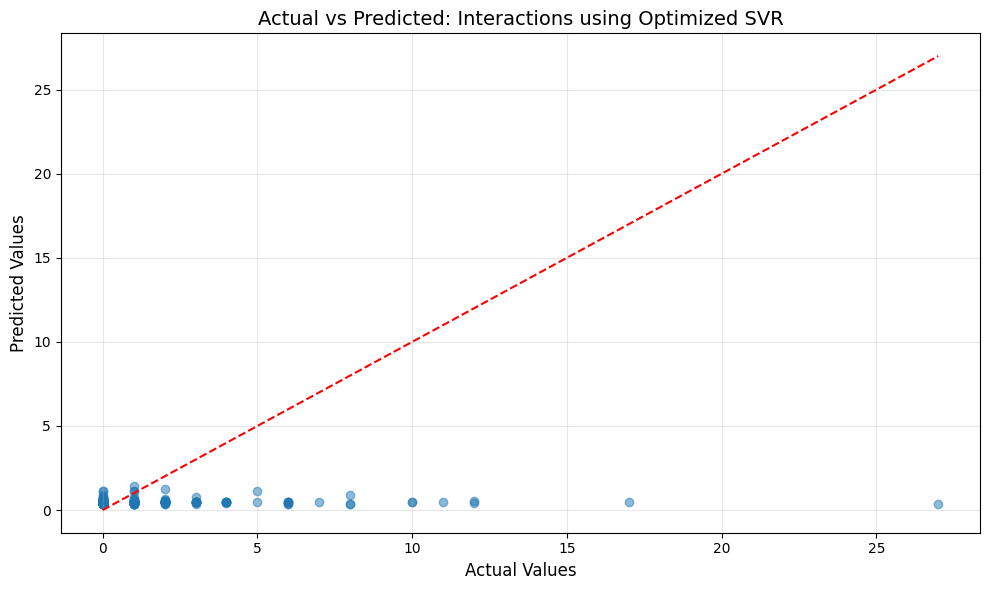

In [21]:
# Visualize SVR optimization results
def plot_svr_results(svr_results):
    """Plot SVR optimization results."""
    if not svr_results:
        print("No SVR results to plot.")
        return
    
    # Create a figure for each target column
    for result in svr_results:
        target_col = result['target_col']
        all_model_results = result['all_model_results']
        
        # Extract data for plotting
        model_names = [r['model_name'] for r in all_model_results[:10]]  # Top 10 models
        rmse_values = [r['rmse'] for r in all_model_results[:10]]
        
        # Create a color map based on kernel type
        kernel_colors = {
            'SVR (linear)': 'blue',
            'SVR (rbf)': 'green',
            'SVR (poly)': 'red',
            'SVR (sigmoid)': 'purple'
        }
        
        colors = []
        for name in model_names:
            for kernel, color in kernel_colors.items():
                if kernel in name:
                    colors.append(color)
                    break
            else:
                colors.append('gray')
        
        # Create the bar plot
        plt.figure(figsize=(12, 6))
        bars = plt.bar(range(len(model_names)), rmse_values, color=colors)
        
        # Add labels and title
        plt.xlabel('Model Configuration')
        plt.ylabel('RMSE (lower is better)')
        plt.title(f'Top 10 SVR Configurations for {target_col}')
        
        # Add x-tick labels
        plt.xticks(range(len(model_names)), [f"Config {i+1}" for i in range(len(model_names))], rotation=45)
        
        # Add a legend
        legend_elements = [plt.Rectangle((0,0),1,1, color=color, label=kernel) 
                          for kernel, color in kernel_colors.items()]
        plt.legend(handles=legend_elements)
        
        # Add value labels on top of bars
        for i, v in enumerate(rmse_values):
            plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
        
        plt.tight_layout()
        plt.savefig(f'SVRResults/svr_optimization_{target_col.replace(".", "")}.png')
        plt.show()
        
        # Create a table with detailed results
        print(f"\nDetailed SVR Results for {target_col}:")
        print("-" * 80)
        print(f"{'Config':<8} {'Kernel':<10} {'C':<10} {'Gamma':<10} {'Epsilon':<10} {'RMSE':<10}")
        print("-" * 80)
        
        for i, model_result in enumerate(all_model_results[:10]):
            params = model_result['params']
            print(f"{i+1:<8} {params['kernel']:<10} {params['C']:<10.4f} {params['gamma']:<10.4f} {params['epsilon']:<10.4f} {model_result['rmse']:<10.4f}")
        
        # Plot actual vs predicted values for the best model
        plt.figure(figsize=(10, 6))
        plt.scatter(result['y_test'], result['y_pred'], alpha=0.5)
        
        # Add a perfect prediction line
        max_val = max(result['y_test'].max(), result['y_pred'].max())
        plt.plot([0, max_val], [0, max_val], 'r--')
        
        plt.title(f'Actual vs Predicted: {target_col} using Optimized SVR', fontsize=14)
        plt.xlabel('Actual Values', fontsize=12)
        plt.ylabel('Predicted Values', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        
        plt.savefig(f'SVRResults/svr_predictions_{target_col.replace(".", "")}.png')
        plt.show()

# Plot the SVR results
plot_svr_results(svr_results)

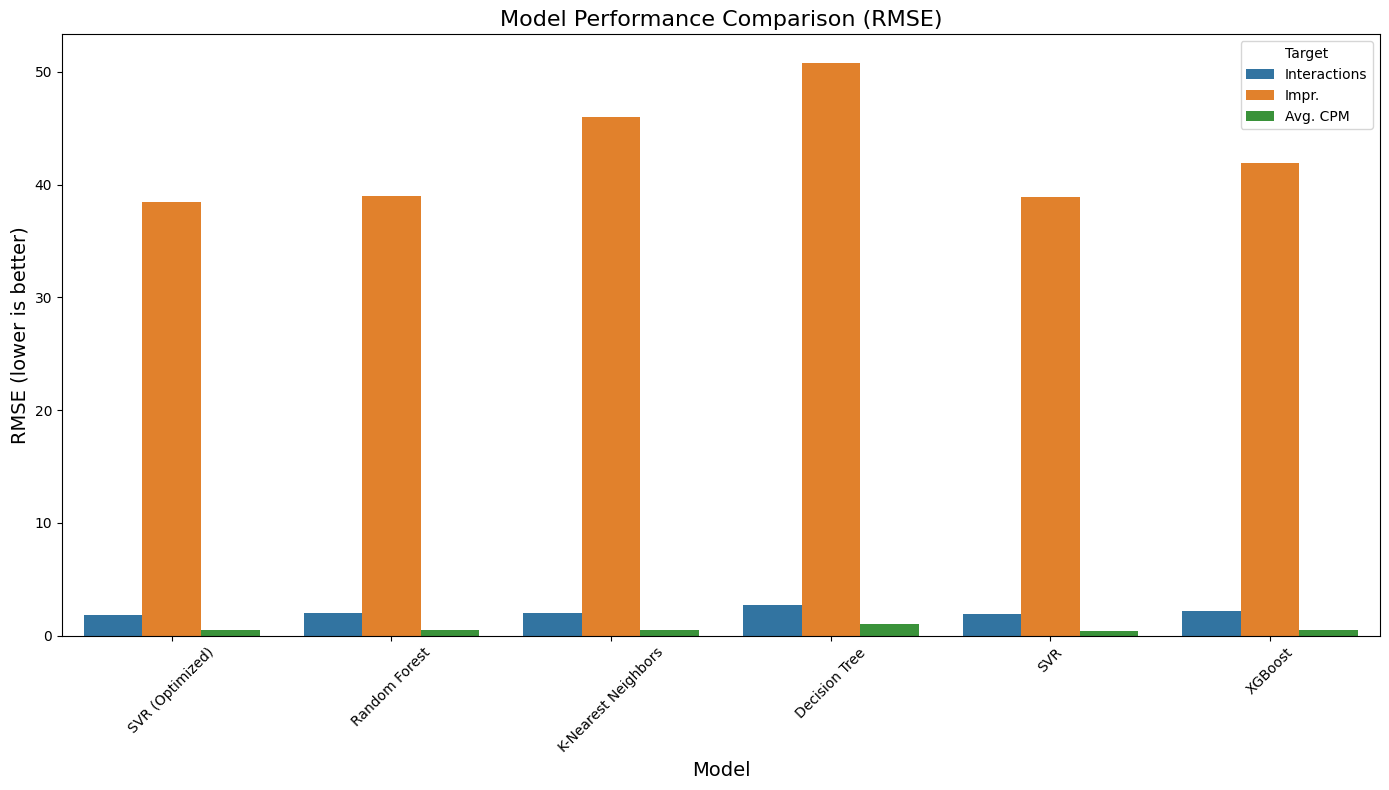


=== Best Model Comparison ===
Best model for Interactions:
  Model: SVR (Optimized)
  RMSE: 1.8800
  Mean Percentage Deviation: 362839088076.98%

Best model for Impr.:
  Model: SVR (Optimized)
  RMSE: 38.4939
  Mean Percentage Deviation: 56.80%

Best model for Avg. CPM:
  Model: SVR
  RMSE: 0.4511
  Mean Percentage Deviation: 123.58%



In [22]:
# Compare SVR with other models
def compare_svr_with_other_models(svr_results, ml_results):
    """Compare optimized SVR with other ML models."""
    if not svr_results or not ml_results:
        print("Not enough results to compare.")
        return
    
    # Create a comparison dataframe
    comparison_data = []
    
    for target_col in set([r['target_col'] for r in svr_results]):
        # Get the SVR result for this target
        svr_result = next((r for r in svr_results if r['target_col'] == target_col), None)
        
        if svr_result:
            # Add SVR result
            comparison_data.append({
                'Target': target_col,
                'Model': 'SVR (Optimized)',
                'RMSE': svr_result['rmse'],
                'Mean % Deviation': svr_result['mean_percentage_deviation']
            })
            
            # Add results from other models
            for result in ml_results:
                if result['target_col'] == target_col:
                    comparison_data.append({
                        'Target': target_col,
                        'Model': result['model_name'],
                        'RMSE': result['rmse'],
                        'Mean % Deviation': result['mean_percentage_deviation']
                    })
    
    comparison_df = pd.DataFrame(comparison_data)
    
    # Plot comparison
    plt.figure(figsize=(14, 8))
    
    # Create a grouped bar chart for RMSE
    ax = sns.barplot(x='Model', y='RMSE', hue='Target', data=comparison_df)
    
    plt.title('Model Performance Comparison (RMSE)', fontsize=16)
    plt.xlabel('Model', fontsize=14)
    plt.ylabel('RMSE (lower is better)', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Target')
    plt.tight_layout()
    
    plt.savefig('SVRResults/model_comparison_rmse.png')
    plt.show()
    
    # Find the best model for each target
    print("\n=== Best Model Comparison ===")
    for target_col in set([r['Target'] for r in comparison_data]):
        target_results = [r for r in comparison_data if r['Target'] == target_col]
        best_model = min(target_results, key=lambda x: x['RMSE'])
        
        print(f"Best model for {target_col}:")
        print(f"  Model: {best_model['Model']}")
        print(f"  RMSE: {best_model['RMSE']:.4f}")
        print(f"  Mean Percentage Deviation: {best_model['Mean % Deviation']:.2f}%")
        print()
    
    return comparison_df

# Compare SVR with other models
comparison_df = compare_svr_with_other_models(svr_results, results)

In [23]:
# Save the optimized SVR models
if svr_results:
    # Create a dictionary to store optimized SVR models
    optimized_svr_models = {}
    
    for result in svr_results:
        target_col = result['target_col']
        optimized_svr_models[target_col] = {
            'model': result['model'],
            'best_params': result['best_params'],
            'rmse': result['rmse'],
            'mean_percentage_deviation': result['mean_percentage_deviation']
        }
    
    # Save models to disk
    with open('SVRResults/optimized_svr_models.pkl', 'wb') as f:
        pickle.dump(optimized_svr_models, f)
    
    print("\nOptimized SVR models saved to 'SVRResults/optimized_svr_models.pkl'")
    
    # Create a summary report
    with open('SVRResults/svr_optimization_summary.txt', 'w') as f:
        f.write("=== SVR Optimization Summary ===\n\n")
        
        for target_col, model_info in optimized_svr_models.items():
            f.write(f"Target: {target_col}\n")
            f.write("-" * 40 + "\n")
            f.write(f"RMSE: {model_info['rmse']:.4f}\n")
            f.write(f"Mean Percentage Deviation: {model_info['mean_percentage_deviation']:.2f}%\n\n")
            
            f.write("Best Parameters:\n")
            for param, value in model_info['best_params'].items():
                f.write(f"  {param}: {value}\n")
            
            f.write("\n" + "=" * 40 + "\n\n")
    
    print("SVR optimization summary saved to 'SVRResults/svr_optimization_summary.txt'")

NameError: name 'pickle' is not defined

As you can see, the original linear model we had actually was the one that performed the best, so changing SVR parameters had quite minimal effect on the output. Unfortunately, the data is just genuinely not that correlated which makes building a model like this challenging.